In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [109]:
df=pd.read_csv('HR_Employee_Attrition.csv')
df.head(8)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0


In [110]:
df.shape

(1470, 35)

In [111]:
pd.set_option('display.max_columns',None)

In [112]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0


Here we can see that there are 34 attributes/inputs, which are contributing to the output/Target (Attrition).

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [114]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Here we can see that there are 35 columns,and for columns EmployeeCount, Over18 and Standard Hours have only value "1". So, we will drop these 3 columns from the dataframe.

In [115]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [116]:
df.shape

(1470, 32)

<AxesSubplot:>

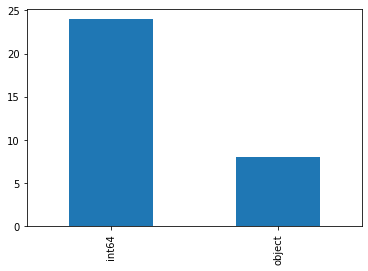

In [117]:
df.dtypes.value_counts().plot(kind='bar')

Now we need to convert, all the string values in the data to integer using LabelEncoder.

In [118]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<AxesSubplot:>

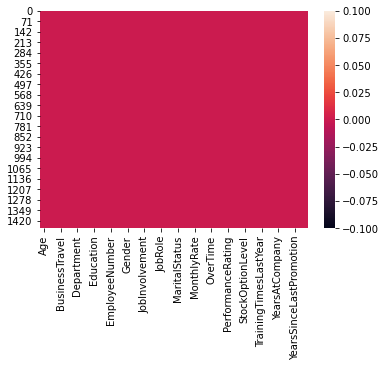

In [119]:
sns.heatmap(df.isnull())

There are no null values, so we can proceed with next step.

In [120]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


Using LabelEncoder to convert object types to integer.

In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [122]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

<AxesSubplot:>

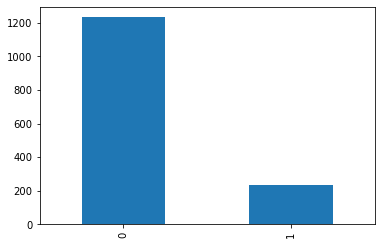

In [123]:
df.Attrition.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

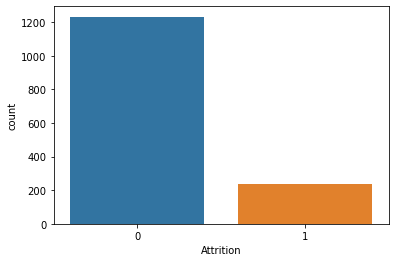

In [124]:
sns.countplot(df.Attrition)

There is large difference between values of 0 and 1 of our Target (Attrition). So, we will use SMOTE method to balance it.

In [125]:
first_column=df.pop('Attrition')

In [126]:
df.insert(0, 'Attrition', first_column)

In [127]:
display(df)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0,39,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0,27,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0,49,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [128]:
x=df.iloc[:,1:]
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [129]:
y=df.iloc[:,-32]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [133]:
df.corr()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.000074,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,-0.056652,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.063991,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,0.077924,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.026846,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010577,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

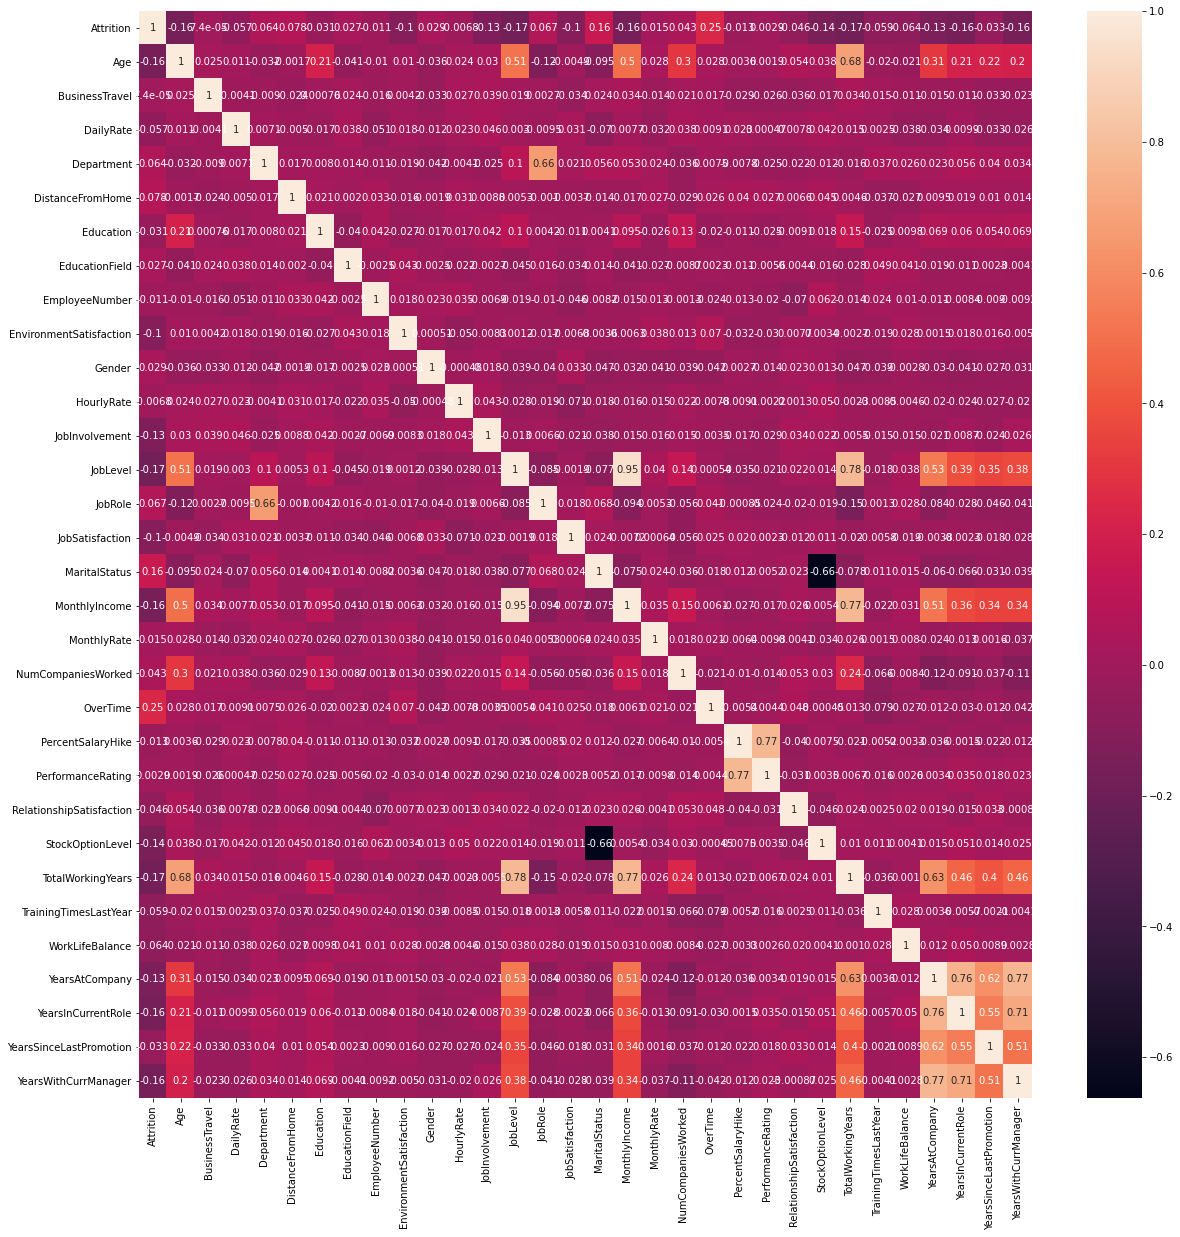

In [155]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,annot_kws={'size': 10})

From above heatmap, we can see that output is in good correlation with all the inputs, so will not drop any column.

# Multicollinearity using VIF

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

We will takeout the input and output from the dataframe using iloc function.

In [131]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [132]:
vif_calc()

                    features  VIF Factor
0                        Age   33.328299
1             BusinessTravel    6.744893
2                  DailyRate    4.978740
3                 Department   12.973763
4           DistanceFromHome    2.320507
5                  Education    9.487323
6             EducationField    3.867284
7             EmployeeNumber    3.927940
8    EnvironmentSatisfaction    7.123545
9                     Gender    2.510511
10                HourlyRate   11.278610
11            JobInvolvement   15.108312
12                  JobLevel   52.568161
13                   JobRole    8.078983
14           JobSatisfaction    7.027051
15             MaritalStatus    5.812187
16             MonthlyIncome   32.087193
17               MonthlyRate    5.016870
18        NumCompaniesWorked    2.726063
19                  OverTime    1.433644
20         PercentSalaryHike   42.319297
21         PerformanceRating  123.081900
22  RelationshipSatisfaction    7.288717
23          Stoc

From above calculation, we can see that performancerating and performance salary hike column has high value, but it is not contributing to the multicolinearity, so we will not drop it.

In [156]:
from imblearn.over_sampling import SMOTE

In [157]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [158]:
x.value_counts()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
46   2               270        1           20                2          3               1807            3                        0       65          2               2         0        1                1              8957           10876        4                   0         21                 3                  4                         0                 13                 1                      3                9               7                   3                        7                       2

In [159]:
y.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

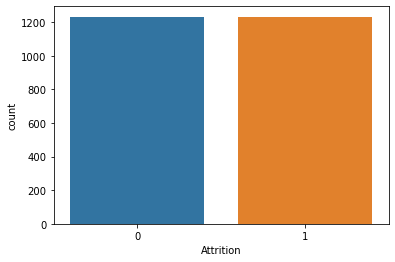

In [160]:
sns.countplot(y)

In [161]:
df.describe()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As we can see from above data, that count is equal in all columns, hence no missing data is present.
In DistanceFromHome,EducationField,Department,Employee number, monthly income,monthly rate etc Mean is greater than median, means data is right skewed in these columns. 
In column Dailyrate,DistanceFromHome,Employee number,monthly income,monthly rate etc. there is large gap between 75th and max,there are chances that some outliers may present.
High standard deviation in column daily rate,employee number,monthly income,monthly rate means data is spreaded.

We will use boxplot type of visualization to see the outliers, and we can see that some outliers are present. Later we will use zcore to remove them.

Attrition                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
Age                         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EmployeeNumber              AxesSubplot(0.390714,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.523571,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.656429,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobInvolvement                 AxesSubplot(0.125,0.513286;0.110714x0.107857)

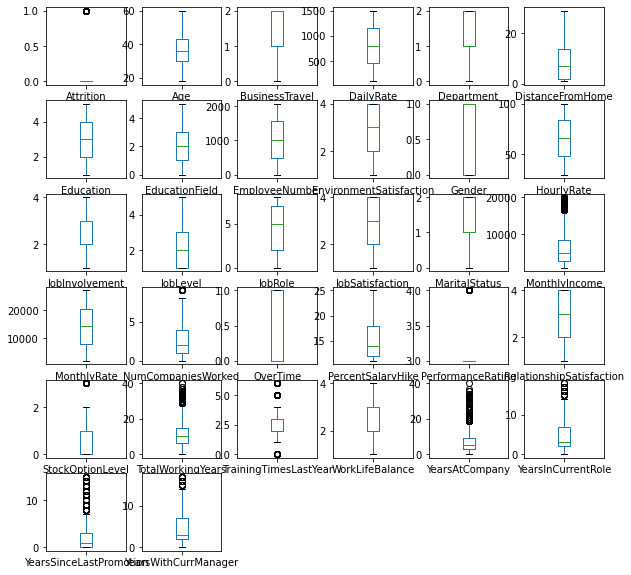

In [162]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

# Removing Outliers using Zscore

In [163]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[2.28090588, 0.4463504 , 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [0.4384223 , 1.32236521, 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [2.28090588, 0.008343  , 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [0.4384223 , 1.08667552, 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [0.4384223 , 1.32236521, 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.4384223 , 0.32016256, 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [164]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 28, 31, 30, 29, 29,

In [165]:
df_new=df[(z<3).all(axis=1)]

In [166]:
df_new.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [167]:
df=df_new

In [168]:
df.shape

(1387, 32)

In [169]:
loss_percentage=(1470-1387)/1470*100
print(loss_percentage)

5.646258503401361


Now we will check the skewness in the data

In [170]:
df.skew()

Attrition                   1.805983
Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [171]:
import matplotlib.pyplot as plt

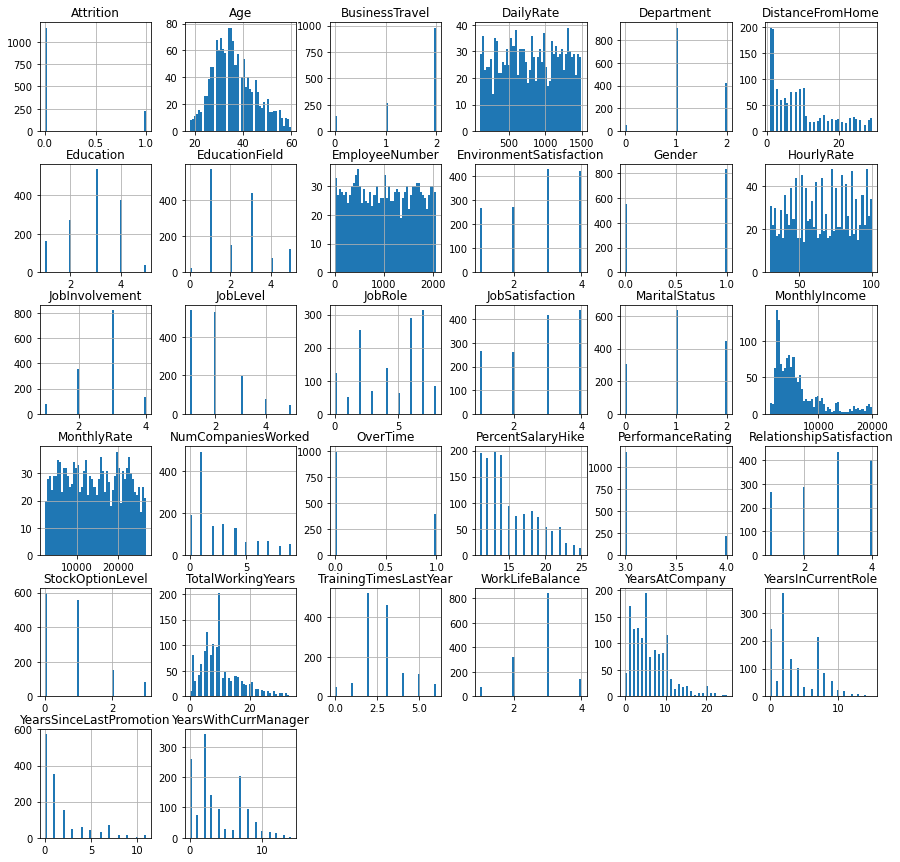

In [172]:
df.hist(bins=50, figsize=(15,15))
plt.show()

In [ ]:
As we can see in hist plot, that data is skewed mostly to the right side.

# Removing Skewness

We will use power transform method to remove skewness from the data.

In [173]:
from sklearn.preprocessing import power_transform

In [174]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.679382  ,  0.80118488,  0.85134032, ...,  0.44557105,
        -1.01768176,  0.70336826],
       [ 1.40844169, -1.02070654, -1.38718503, ...,  1.08554135,
         0.22666909,  1.09308046],
       [ 0.26626622,  0.80118488,  1.4623354 , ..., -1.48813823,
        -1.01768176, -1.41195651],
       ...,
       [ 0.77707657, -1.02070654, -0.07604443, ...,  1.2517394 ,
         1.66950428,  1.66860537],
       [-1.11534675, -1.02070654,  0.31856967, ..., -0.70154273,
         1.01208687,  0.17909373],
       [-0.97042895, -1.02070654,  0.13284326, ...,  1.08554135,
         0.22666909,  1.09308046]])

# Scaling of the data

We will use StandardScaler for scaling of data.

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.679382  ,  0.80118488,  0.85134032, ...,  0.44557105,
        -1.01768176,  0.70336826],
       [ 1.40844169, -1.02070654, -1.38718503, ...,  1.08554135,
         0.22666909,  1.09308046],
       [ 0.26626622,  0.80118488,  1.4623354 , ..., -1.48813823,
        -1.01768176, -1.41195651],
       ...,
       [ 0.77707657, -1.02070654, -0.07604443, ...,  1.2517394 ,
         1.66950428,  1.66860537],
       [-1.11534675, -1.02070654,  0.31856967, ..., -0.70154273,
         1.01208687,  0.17909373],
       [-0.97042895, -1.02070654,  0.13284326, ...,  1.08554135,
         0.22666909,  1.09308046]])

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [178]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [180]:
x_train.shape

(1726, 31)

In [181]:
x_test.shape

(740, 31)

In [182]:
y_train.shape

(1726,)

In [183]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.8337195828505214

In [184]:
pred=lg.predict(x_test)
print('Predicted result value:',pred)
print('actual value',y_test)

Predicted result value: [1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 

In [185]:
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score: 0.8364864864864865
[[314  50]
 [ 71 305]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       364
           1       0.86      0.81      0.83       376

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



In logistic regession accuracy is 84%,we will try to improve it.

In [186]:
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

model=[gnb,svc,dtc,knc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',pred)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 

From above logistic and classifiers below are the accuracy percentage:
logistic 84%
GaussianNB 78%
SVC 89%
DecisionTreeClassifier 79%
KNeighborsClassifier 84%

# Cross Validation

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
score=cross_val_score(lg,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.67313916 0.73462783 0.87337662 0.81818182 0.87337662 0.81818182
 0.84090909 0.84090909]
0.8090877569032909
0.06565346244477523


In [189]:
score=cross_val_score(gnb,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.6407767  0.72491909 0.80844156 0.73051948 0.77272727 0.77922078
 0.78571429 0.79220779]
0.7543158702139285
0.05078393523784207


In [190]:
score=cross_val_score(svc,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.69255663 0.79935275 0.95454545 0.92532468 0.9512987  0.93831169
 0.93181818 0.92207792]
0.8894107510612365
0.08766504473120541


In [191]:
score=cross_val_score(dtc,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.65372168 0.75728155 0.8474026  0.87012987 0.72077922 0.72402597
 0.66233766 0.60714286]
0.7303526772580171
0.08643943067084701


In [192]:
score=cross_val_score(knc,x,y,cv=8)
print(score)
print (score.mean())
print (score.std())

[0.84466019 0.82524272 0.8474026  0.82142857 0.83116883 0.80844156
 0.82467532 0.81493506]
0.8272443575841634
0.012622209041477773


In Cross validation also our scores are matching,and in this also svc model is performing best.

# Hypermeter Tuning

In [193]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_gnb={}
param_svc={'kernel':['linear','rbf','poly'],'C':[1,10]}
param_dtc={'criterion':['gini','entropy']}
param_knc={'n_neighbors':[5,10,15]}

modelgnb=GaussianNB()
modelsvc=SVC()
modeldtc=DecisionTreeClassifier()
modelknc=KNeighborsClassifier()

In [207]:
gridgnb=GridSearchCV(estimator=modelgnb,param_grid=param_gnb)
gridgnb.fit(x,y)
print(gridgnb)
print(gridgnb.best_score_)
print(gridgnb.best_estimator_)
print(gridgnb.best_params_)

GridSearchCV(estimator=GaussianNB(), param_grid={})
0.7405203209302708
GaussianNB()
{}


In [198]:
gridsvc=GridSearchCV(estimator=modelsvc,param_grid=param_svc)
gridsvc.fit(x,y)
print(gridsvc)
print(gridsvc.best_score_)
print(gridsvc.best_estimator_)
print(gridsvc.best_params_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})
0.8865247062108385
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


In [199]:
griddtc=GridSearchCV(estimator=modeldtc,param_grid=param_dtc)
griddtc.fit(x,y)
print(griddtc)
print(griddtc.best_score_)
print(griddtc.best_estimator_)
print(griddtc.best_params_)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.6768237100787544
DecisionTreeClassifier()
{'criterion': 'gini'}


In [203]:
gridknc=GridSearchCV(estimator=modelknc,param_grid=param_knc)
gridknc.fit(x,y)
print(gridknc)
print(gridknc.best_score_)
print(gridknc.best_estimator_)
print(gridknc.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15]})
0.818752412314919
KNeighborsClassifier(n_neighbors=10)
{'n_neighbors': 10}


Now we will use the above values to find the best score.

In [204]:
gnb1=GaussianNB()
svc1=SVC(kernel='rbf')
dtc1=DecisionTreeClassifier(criterion='gini')
knc1=KNeighborsClassifier(n_neighbors=10)

model=[gnb1,svc1,dtc1,knc1]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',pred)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1
 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 

From above gridsearchCV results, the accuracy percentage of the classifiers are as below:
    
GaussianNB 78%,accuracy remains same as we have calculated.
SVC 89%,accuracy remains same as we have calculated.
DecisionTreeClassifier 80%,accuracy increased by 1% from 79%.
KNeighborsClassifier 86%,accuracy increased by 2% from 84%.

So we will choose the SVC model with kernel='rbf'as its accuracy is best i.e 89%

In [208]:
import pickle
filename='HR_Attrition.pkl'
pickle.dump(svc1, open(filename,'wb'))